# Select a One-Dimensional Function

In [9]:
import torch
import torchvision
from torchvision import datasets, models, transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
device

device(type='cuda', index=0)

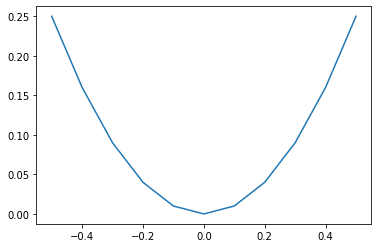

In [1]:
# demonstrate simple x^2 function
from matplotlib import pyplot
 
# simple function
def calculate(x):
	return x * x
 
# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

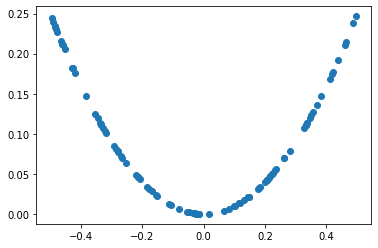

In [2]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

# Define a Discriminator Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


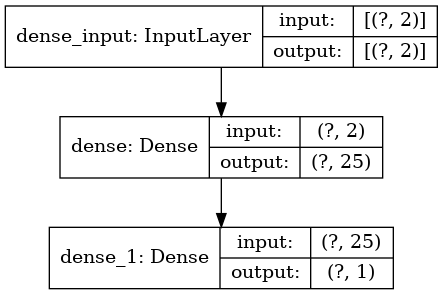

In [4]:
# define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.375 0.546875
1 0.5625 0.5
2 0.515625 0.515625
3 0.46875 0.609375
4 0.546875 0.5625
5 0.546875 0.609375
6 0.59375 0.671875
7 0.578125 0.515625
8 0.46875 0.53125
9 0.640625 0.53125
10 0.40625 0.5625
11 0.5 0.625
12 0.5625 0.625
13 0.515625 0.578125
14 0.40625 0.65625
15 0.515625 0.59375
16 0.5 0.609375
17 0.40625 0.65625
18 0.5 0.625
19 0.453125 0.46875
20 0.4375 0.71875
21 0.375 0.625
22 0.375 0.59375
23 0.484375 0.625
24 0.546875 0.75
25 0.5625 0.59375
26 0.359375 0.640625
27 0.515625 0.65625
28 0.421875 0.59375
29 0.40625 0.625
30 0.40625 0.609375
31 0.390625 0.65625
32 0.359375 0.515625
33 0.4375 0.640625
34 0.390625 0.765625
35 0.359375 0.546875
36 0.375 0.65625
37 0.40625 0.703125
38 0.390625 0.703125
39 0.484375 0.734375
40 0.296875 0.734375
41 0.359375 0.5625
42 0.390625 0.71875
43 0.390625 0.609375
44 0.4375 0.671875
45 0.640625 0.703125
46 0.40625 0.609375
47 0.359375 0.75
48 0.34375 0.625
49 0.453125 0.671875
50 0.421875 0.734375
51 0.328125 0.59375
52 0.375 0.734375
53 0.

416 0.875 0.96875
417 0.875 0.9375
418 0.9375 0.90625
419 0.859375 0.9375
420 0.921875 0.921875
421 0.90625 0.875
422 0.90625 0.921875
423 0.875 0.90625
424 0.953125 0.9375
425 0.875 0.875
426 0.921875 0.96875
427 0.921875 0.953125
428 0.96875 0.890625
429 0.90625 0.890625
430 0.890625 0.890625
431 0.953125 0.84375
432 0.921875 0.921875
433 0.859375 0.9375
434 0.921875 0.9375
435 0.9375 0.90625
436 0.84375 0.953125
437 0.921875 0.921875
438 0.90625 0.953125
439 0.96875 0.9375
440 0.921875 0.9375
441 0.984375 0.953125
442 0.875 0.90625
443 0.921875 0.890625
444 0.921875 0.9375
445 0.921875 0.859375
446 0.921875 0.9375
447 0.890625 0.953125
448 0.921875 0.953125
449 0.96875 0.953125
450 0.953125 0.984375
451 0.9375 0.96875
452 0.90625 0.9375
453 0.984375 0.953125
454 0.953125 0.953125
455 0.984375 0.96875
456 0.9375 0.9375
457 0.96875 0.921875
458 0.9375 0.875
459 0.953125 0.859375
460 0.96875 0.859375
461 0.984375 0.953125
462 0.96875 0.890625
463 0.96875 0.875
464 0.96875 0.9375
465 0.

898 1.0 0.9375
899 1.0 0.890625
900 1.0 0.953125
901 1.0 0.90625
902 1.0 0.796875
903 1.0 0.921875
904 1.0 0.828125
905 1.0 0.875
906 1.0 0.8125
907 1.0 0.703125
908 1.0 0.796875
909 1.0 0.90625
910 1.0 0.9375
911 1.0 0.90625
912 1.0 0.859375
913 1.0 0.921875
914 1.0 0.859375
915 1.0 0.84375
916 1.0 0.921875
917 1.0 0.828125
918 1.0 0.84375
919 1.0 0.90625
920 1.0 0.890625
921 1.0 0.890625
922 1.0 0.890625
923 1.0 0.890625
924 1.0 0.921875
925 1.0 0.90625
926 1.0 0.859375
927 1.0 0.84375
928 1.0 0.921875
929 1.0 0.859375
930 1.0 0.890625
931 1.0 0.84375
932 1.0 0.96875
933 1.0 0.90625
934 1.0 0.921875
935 1.0 0.921875
936 1.0 0.859375
937 1.0 0.90625
938 1.0 0.9375
939 1.0 0.921875
940 1.0 0.859375
941 1.0 0.890625
942 1.0 0.890625
943 1.0 0.890625
944 1.0 0.90625
945 1.0 0.828125
946 1.0 0.84375
947 1.0 0.890625
948 1.0 0.875
949 1.0 0.921875
950 1.0 0.921875
951 1.0 0.75
952 1.0 0.890625
953 1.0 0.78125
954 1.0 0.921875
955 1.0 0.8125
956 1.0 0.828125
957 1.0 0.859375
958 1.0 0.84375

# Define a Generator Model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


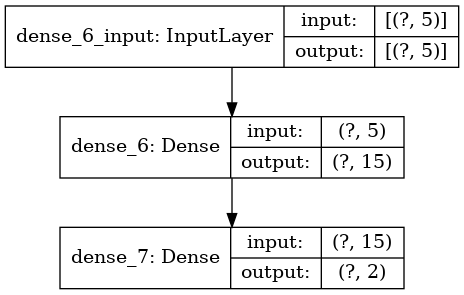

In [6]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# define the discriminator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

# Define GAN

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


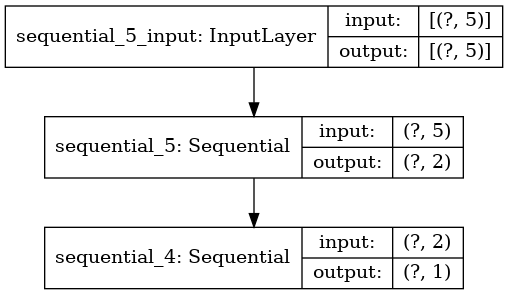

In [7]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

1999 0.5899999737739563 0.47999998927116394


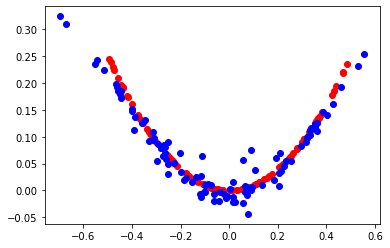

3999 0.6299999952316284 0.5400000214576721


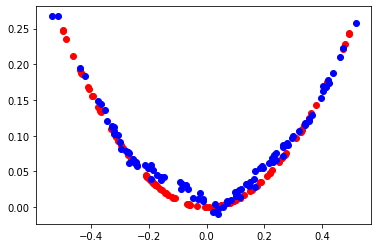

5999 0.6200000047683716 0.5699999928474426


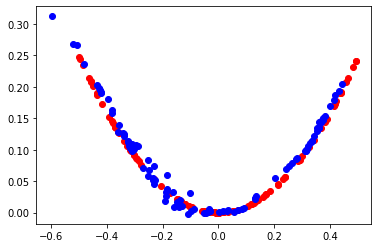

7999 0.7200000286102295 0.3700000047683716


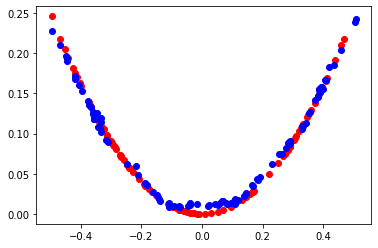

9999 0.5600000023841858 0.6299999952316284


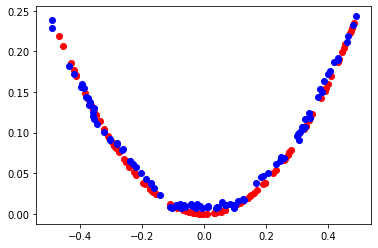

In [8]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n, 1))
    return X, y
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 398162080810936224
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1273362515694465883
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6207205332373595991
physical_device_desc: "device: XLA_GPU device"
]
